# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
import numpy as np

# Choose only first two features (columns) of iris.data
X2 = iris.data[:, :2]
y2 = iris.target

# SVM is in its basic form a 2-class classifier, so eliminate iris.target == 2 from the data
mask = y2 != 2
X2 = X2[mask]
y2 = y2[mask]

print("X2 shape:", X2.shape)
print("Unique classes in y2:", np.unique(y2))


X2 shape: (100, 2)
Unique classes in y2: [0 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

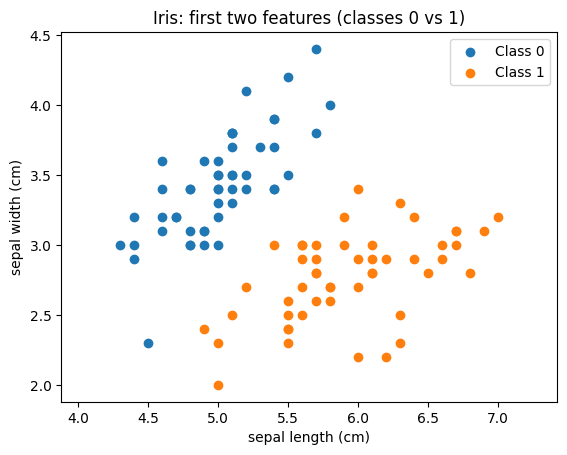

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot of the two classes (0 and 1) using the first two features
plt.figure()
plt.scatter(X2[y2==0][:,0], X2[y2==0][:,1], label="Class 0")
plt.scatter(X2[y2==1][:,0], X2[y2==1][:,1], label="Class 1")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris: first two features (classes 0 vs 1)")
plt.legend()
plt.axis('equal')
plt.show()


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# Try a couple of values for the regularization parameter C
for C in [1.0, 200.0]:
    SVMmodel = SVC(kernel='linear', C=C, random_state=42)
    SVMmodel.fit(X_train2, y_train2)
    acc = SVMmodel.score(X_test2, y_test2)
    print(f"C={C:>6}: test accuracy = {acc:.3f}")

# Keep the last trained model (C=200) for the next plots


C=   1.0: test accuracy = 1.000
C= 200.0: test accuracy = 1.000


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

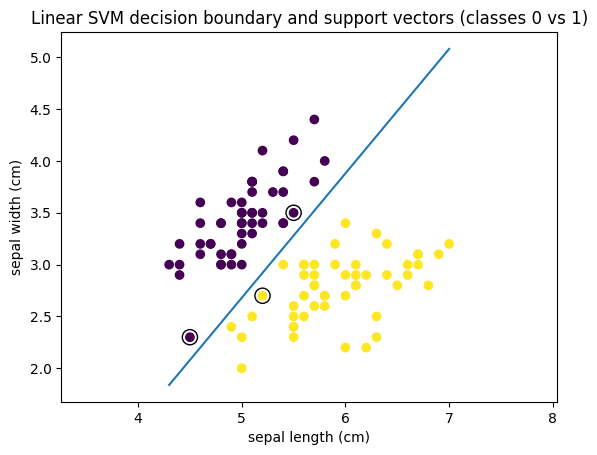

In [7]:
import numpy as np
import matplotlib.pyplot as plt

supvectors = SVMmodel.support_vectors_

# Separating line coefficients for binary linear SVM: w0*x + w1*y + b = 0
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

# Plot the data points
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=y2)

# Plot the support vectors
plt.scatter(supvectors[:,0], supvectors[:,1], s=120, facecolors='none', edgecolors='k')

# Decision boundary line
x_min, x_max = X2[:,0].min(), X2[:,0].max()
x_vals = np.linspace(x_min, x_max, 200)
y_vals = -(W[0]*x_vals + b) / W[1]
plt.plot(x_vals, y_vals)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Linear SVM decision boundary and support vectors (classes 0 vs 1)")
plt.axis('equal')
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

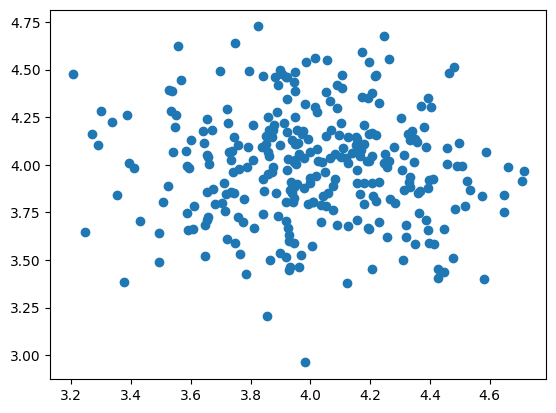

In [8]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

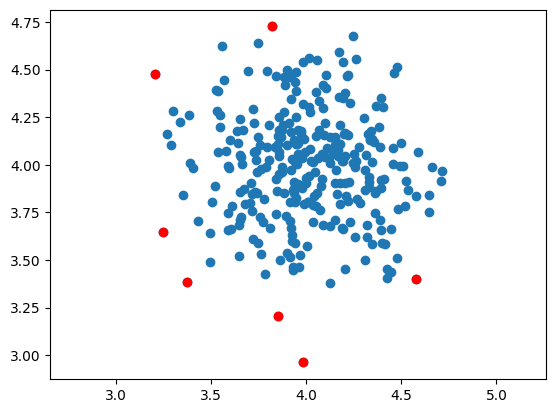

In [9]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

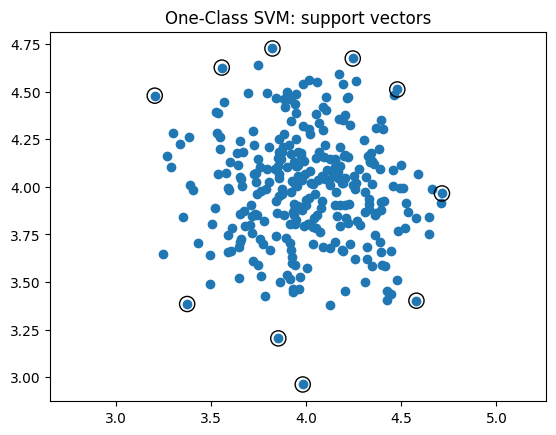

In [10]:
import matplotlib.pyplot as plt

supvectors_one = SVMmodelOne.support_vectors_

plt.figure()
plt.scatter(x[:,0], x[:,1])
plt.scatter(supvectors_one[:,0], supvectors_one[:,1], s=120, facecolors='none', edgecolors='k')
plt.title("One-Class SVM: support vectors")
plt.axis('equal')
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


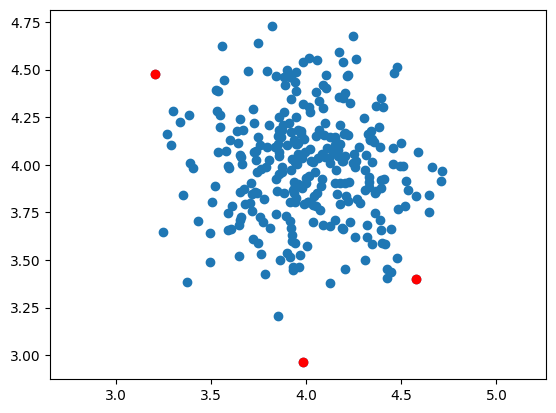

In [11]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()